# EC7212 – Computer Vision and Image Processing

## Assignment 2 – Image Segmentation Tasks in Python

- Reg. No: EG/2020/4047
- Name: LELWALA LGSR


### Import Libraries

In [41]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Setup result directory
Path("./results").mkdir(exist_ok=True)


### Task 1 – Generate Image, Add Noise, and Apply Otsu's Thresholding

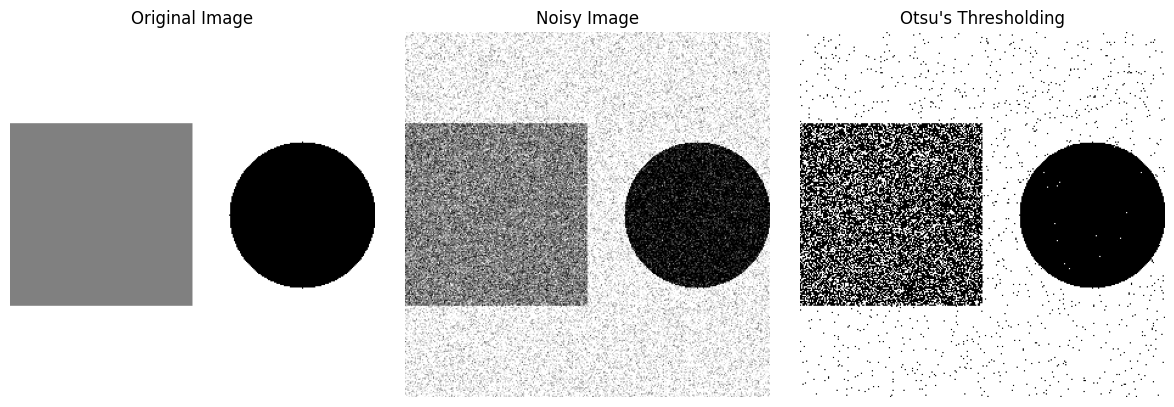

In [42]:
# Generate a simple grayscale image with 2 objects and a background

def generate_image(width, height):
    image = np.ones((height, width), dtype=np.uint8) * 255  # White background
    
    # Draw gray square
    square_size = width // 2
    square_y = (height - square_size) // 2
    image[square_y:square_y+square_size, :square_size] = 128  # Gray
    
    # Draw black circle
    circle_radius = width // 5
    circle_center = (width - circle_radius, height // 2)
    cv2.circle(image, circle_center, circle_radius, 0, -1)  # Black
    
    return image

# Add Gaussian noise to image
def add_gaussian_noise(image, mean=0, stddev=50):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Generate the original and noisy images
original_img = generate_image(300, 300)
noisy_img = add_gaussian_noise(original_img)

# Apply Otsu's thresholding
_, otsu_img = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display and save results
titles = ['Original Image', 'Noisy Image', "Otsu's Thresholding"]
images = [original_img, noisy_img, otsu_img]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    cv2.imwrite(f"./results/task1_{titles[i].replace(' ', '_').lower()}.png", images[i])

plt.tight_layout()
plt.show()


### Task 2 – Region Growing Segmentation

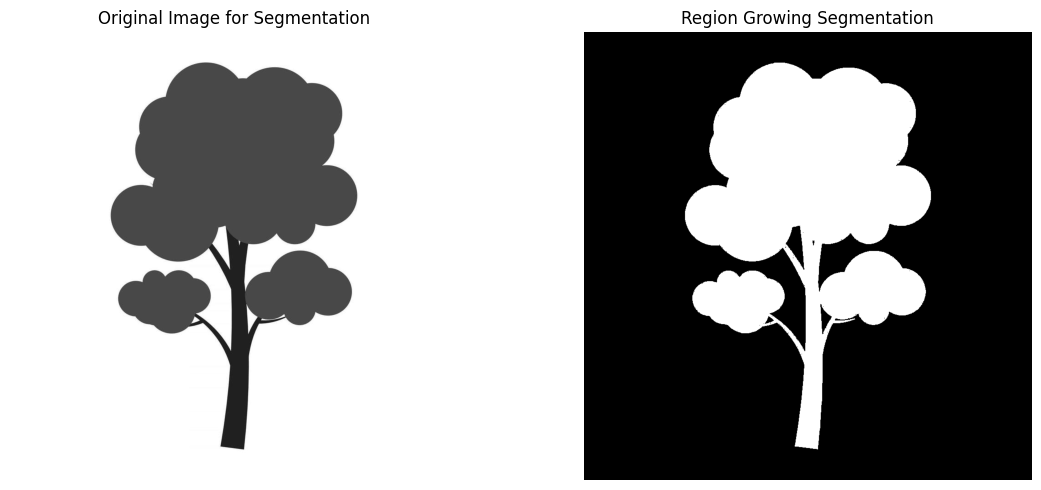

In [50]:


# Region growing algorithm implementation
def region_growing(image, seeds, threshold):
    mask = np.zeros_like(image, dtype=np.uint8)
    height, width = image.shape
    queue = seeds.copy()

    while queue:
        x, y = queue.pop(0)
        current_val = image[y, x]
        mask[y, x] = 255

        # Iterate over 8-neighborhood
        for i in range(-1, 2):
            for j in range(-1, 2):
                nx, ny = x + i, y + j
                if (0 <= nx < width) and (0 <= ny < height):
                    if mask[ny, nx] == 0 and abs(int(image[ny, nx]) - int(current_val)) <= threshold:
                        queue.append((nx, ny))
                        mask[ny, nx] = 255  # Mark visited

    return mask

# Load input image for segmentation (update image path if needed)
segmentation_image_path = "sample_image/input.jpg"
image = cv2.imread(segmentation_image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Cannot find {segmentation_image_path}")

# Define seed points and threshold
seeds = [(490, 200), (680, 170), (400, 400)]  # Update seed points as required
threshold_range = 10

# Perform region growing
segmented_img = region_growing(image, seeds, threshold_range)

# Display and save segmentation results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image for Segmentation')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Region Growing Segmentation')
plt.axis('off')

cv2.imwrite("./results/task2_original_segmentation.png", image)
cv2.imwrite("./results/task2_segmented.png", segmented_img)

plt.tight_layout()
plt.show()
